In [1]:
import torch
import torch.nn as nn

In [2]:
linear = nn.Linear(2,3)
print(linear.weight.shape, linear.bias.shape)

torch.Size([3, 2]) torch.Size([3])


In [3]:
linear = nn.Linear(2,3)

print(linear.weight.shape, linear.bias.shape)


torch.Size([3, 2]) torch.Size([3])


In [4]:
x = torch.randn(2,2,2,2)
y = linear(x)
print(y.shape)

y1 = x.matmul(linear.weight.t())
print(y1.shape)

print(y1)
print(linear.bias, linear.bias.shape)
y2 = y1[0,0,0,:] + linear.bias
y1 = torch.add(y1,linear.bias)
nn.functional.avg_pool2d
print(y1[0,0,0,:])
print(y2)



torch.Size([2, 2, 2, 3])
torch.Size([2, 2, 2, 3])
tensor([[[[ 8.0030e-02, -3.8439e-02, -3.8664e-01],
          [ 2.6316e-01, -6.7127e-01, -8.8860e-02]],

         [[ 8.2630e-01, -2.2366e+00,  6.6488e-04],
          [ 2.4353e-01, -7.4729e-01,  1.9140e-01]]],


        [[[-2.8634e-01,  6.8095e-01,  2.0405e-01],
          [ 3.5916e-01, -1.0866e+00,  2.4867e-01]],

         [[ 3.3837e-01, -7.2934e-01, -4.0461e-01],
          [ 7.2561e-02, -6.4509e-01,  9.7379e-01]]]],
       grad_fn=<UnsafeViewBackward0>)
Parameter containing:
tensor([-0.2952, -0.2333,  0.5252], requires_grad=True) torch.Size([3])
tensor([-0.2151, -0.2717,  0.1385], grad_fn=<SliceBackward0>)
tensor([-0.2151, -0.2717,  0.1385], grad_fn=<AddBackward0>)


In [5]:
# Tensor broadcasting

a = torch.randn(2, 2, 4)

b = 20
print(a,b)
a = a + b
print(a)

c = torch.randn(2,4)

d = a + c

print(c)
print(a)

e = a * c

c1 = torch.randn(4,2)
print(a.shape, c1.shape)
f = a @ c1

print(e, f)


tensor([[[-1.1844, -1.0125, -1.2591, -0.8890],
         [-0.0664, -0.9899, -1.8770,  0.5606]],

        [[-0.1273, -2.4883,  2.1172,  1.6869],
         [ 0.0428, -0.1366,  0.7813,  1.4826]]]) 20
tensor([[[18.8156, 18.9875, 18.7409, 19.1110],
         [19.9336, 19.0101, 18.1230, 20.5606]],

        [[19.8727, 17.5117, 22.1172, 21.6869],
         [20.0428, 19.8634, 20.7813, 21.4826]]])
tensor([[-1.1011,  0.5041, -0.0018, -1.6716],
        [-1.4993, -0.9495,  0.8962, -0.6574]])
tensor([[[18.8156, 18.9875, 18.7409, 19.1110],
         [19.9336, 19.0101, 18.1230, 20.5606]],

        [[19.8727, 17.5117, 22.1172, 21.6869],
         [20.0428, 19.8634, 20.7813, 21.4826]]])
torch.Size([2, 2, 4]) torch.Size([4, 2])
tensor([[[-2.0717e+01,  9.5721e+00, -3.4049e-02, -3.1946e+01],
         [-2.9887e+01, -1.8050e+01,  1.6243e+01, -1.3517e+01]],

        [[-2.1881e+01,  8.8281e+00, -4.0183e-02, -3.6252e+01],
         [-3.0051e+01, -1.8860e+01,  1.8625e+01, -1.4123e+01]]]) tensor([[[ 31.9846, -36.3355],


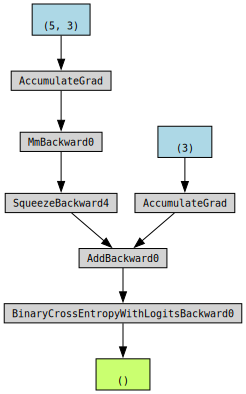

In [6]:
from torchviz import make_dot, make_dot_from_trace

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

make_dot(loss)